In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import nr_dif_cs_sp, dsig_dk_3BN, dsig_dk_3BNa
from screening import Fermi_length
from SeltzerBerger import read_data

# Style of the plot
plt.style.use('../../utils/minimal.style')

In [2]:
# Physical parameters
Z = 47
T1 = 100. # 100 keV
g1 = 1. + T1 / 511.
Lf = Fermi_length(Z)

In [3]:
# discretization of k axis
Nk = 1000
axis_k  = np.linspace(0., g1-1., Nk)

In [4]:
# Non-relativistic cross-section with Elwert correction
cs_screen = np.array([ nr_dif_cs_sp(Z, k, g1, Lf, elwert=True) for k in axis_k ])
cs_screen = axis_k * cs_screen

In [5]:
# Non-relativistic cross-section with Elwert correction
# We introduce on purpose the wrong term 1/beta_1 ** 2
p1 = np.sqrt(g1 ** 2 - 1.)
b1 = np.sqrt(1.-(1. / g1 ** 2))
cs_screen_error = cs_screen * (p1 / b1) ** 2

In [6]:
# Non-relativistic cross section from 3BN Motz 1959 (no screening)
cs_unscreen = np.zeros(Nk)
cs_unscreen[1:-1] = np.array([ dsig_dk_3BNa(Z, g1 ,k) for k in axis_k[1:-1] ])

In [7]:
# Data from Seltzer and Berger
cs_absx, cs_seltzer = read_data(Z,T1)

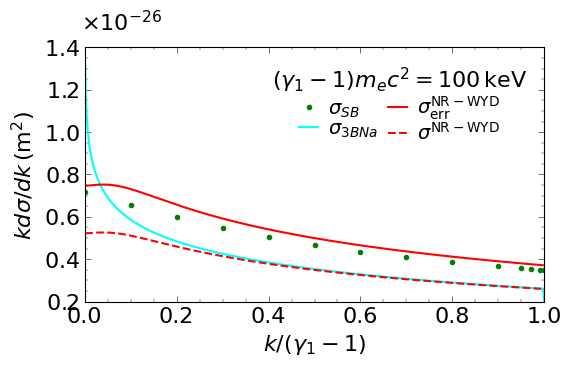

In [8]:
# Figure from the article

fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(cs_absx, cs_seltzer, ls='', marker='o', c='g', label=r"$\sigma_{SB}$")
axs.plot(axis_k[1:] / (g1 - 1.), cs_unscreen[1:], c='cyan', label=r"$\sigma_{3BNa}$")
axs.plot(axis_k[1:-1] / (g1 - 1.), cs_screen_error[1:-1], c='r', label=r"$\sigma^{\rm NR-WYD}_{\rm err}$")
axs.plot(axis_k[1:-1] / (g1 - 1.), cs_screen[1:-1], c='r', ls='--', label=r"$\sigma^{\rm NR-WYD}$")

# x axis
axs.set_xlabel(r"$ k / (\gamma_1 - 1) $")
axs.set_xlim([0.,1.])

# y axis
axs.set_ylabel(r"$ k d \sigma / dk \, \rm (m^2)$")
axs.set_ylim([0.2e-26,1.4e-26])
location = np.linspace(0.2e-26,1.4e-26, 7)
axs.yaxis.set_ticks(location)
axs.yaxis.set_ticklabels([r'${0:.{1}f}$'.format(1.e26*elem, 1) for elem in location])
axs.text(0.08, 1.1, r'$ \times 10^{-26} $', ha='center', va='center', transform=axs.transAxes, bbox=dict(alpha=0, facecolor="white", edgecolor="white") )

# legend
plt.legend(loc='best', ncol=2, title=r"$(\gamma_1-1)m_ec^2={:d} \, \rm keV$".format(int(T1)))
plt.tight_layout()

# save the figure
fig.savefig("../figures/figure_3_3b", bbox_inches='tight')

plt.show()